1. 구글 뉴스 RSS에 접속하여 뉴스 제목, 뉴스 요약 가져오기

In [1]:
import requests                         # 웹 페이지의 HTML을 가져오는 모듈
import re                               # 정규표현식을 사용하기 위한 모듈
import xml.etree.ElementTree as ET      # XML 데이터를 파싱하는 모듈

from konlpy.tag import Okt
okt = Okt()
from collections import Counter

In [2]:
url = 'https://news.google.com/rss?hl=ko&gl=KR&ceid=KR:ko' 

headers = {
        'User-Agent': 'Mozilla/5.0',
        'Content-Type': 'text/html; charset=utf-8'
        }

response = requests.get(url, headers=headers)

root_element = ET.fromstring(response.text)
iter_element = root_element.iter(tag="item")        # item 태그를 찾아서 반복

In [3]:
title_list = []
description_list = []
for element in iter_element:
    title_list.append(element.find("title").text)           # title 태그에서 텍스트 추출

    # 한글과 띄어쓰기를 제외한 모든 글자를 제거
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')                  # 한글과 띄어쓰기를 제외한 모든 글자
    description = element.find("description").text          # description 태그에서 텍스트 추출
    description_list.append(hangul.sub("",description))     
    #description_list.append(description)     

# 뉴스제목과 뉴스요약을 3개만 가져와 출력
print("뉴스제목: ",title_list[0:3])
print("뉴스요약: ",description_list[0:3])

뉴스제목:  ["바그너 용병 조직 '러시아 정부 직접 통제' 본격화...아프리카·중동서 활동 이어질 듯 - 한국어 방송 - VOA Korean", '서울 호우주의보 해제…곳곳에서 침수 피해 신고 | 서울특별시 미디어재단 TBS - TBS뉴스', '춘천 시간당 60㎜ 호우경보…수도권·충청 호우주의보 - 연합뉴스TV']
뉴스요약:  ['  바그너 용병 조직 러시아 정부 직접 통제 본격화아프리카중동서 활동 이어질 듯 한국어 방송     바그너 그룹 해체 수순푸틴 아프리카중동 용병 사업도 접수한다 경향신문  프리고진 돈줄 끊어푸틴 바그너그룹 해외거점 접수 돌입 한국경제  자막뉴스 놔주겠다더니푸틴 프리고진 자산 몰수 착수  연합뉴스  연합뉴스  러시아 군부 엘리트 수로비킨 장군 체포반란으로 자존심 구긴 푸틴 배신자 숙청 나섰나 경향신문   뉴스에서 전체 콘텐츠 보기', '  서울 호우주의보 해제곳곳에서 침수 피해 신고  서울특별시 미디어재단  뉴스  내일 호남제주 최대  물폭탄수도권도 피해 속출 동아일보   뉴스에서 전체 콘텐츠 보기', '  춘천 시간당  호우경보수도권충청 호우주의보 연합뉴스  날씨 전국 장맛비집중호우 주의 중부 시간당  연합뉴스  종합 장마전선 북상 다시 장마수도권 최대  물폭탄 뉴스핌  뉴스쏙 전국 곳곳 거센 장맛비큰 피해 입었던 남부 밤새 또 물벼락 주의  연합뉴스  연합뉴스  또 강한 장맛비 내린다내일은 중부모레는 남부 연합뉴스   뉴스에서 전체 콘텐츠 보기']


2. 형태소를 분석하여 빈도수를 계산

In [4]:
noun_list = []
for title in title_list:
    for noun in okt.nouns(title):
        if len(noun) > 1:
            noun_list.append(noun)
# print("명사: ", noun_list)

for description in description_list:
    for noun in okt.nouns(description):
        if len(noun) > 1:
            noun_list.append(noun)
# print("명사: ", noun_list)

noun_freq_list = Counter(noun_list)
print(noun_freq_list)

Counter({'뉴스': 75, '전체': 30, '콘텐츠': 30, '보기': 30, '연합뉴스': 25, '한국': 17, '경제': 15, '동아일보': 13, '경향신문': 11, '한국어': 10, '방송': 10, '일보': 10, '게임': 9, '신고': 8, '코리아': 8, '정부': 7, '시간': 7, '광주': 7, '호우': 6, '주의보': 6, '피해': 6, '수도권': 6, '장관': 6, '국가': 6, '세력': 6, '심사': 6, '박영수': 6, '잔해': 6, '한일': 6, '스템': 6, '임플란트': 6, '전자': 6, '판정': 6, '디아블로': 6, '오징어': 6, '김하성': 6, '안타': 6, '김민재': 6, '황의조': 6, '본격': 5, '의대': 5, '정원': 5, '구속': 5, '잠수정': 5, '통화': 5, '스와프': 5, '논의': 5, '김용림': 5, '뮌헨': 5, '한화': 5, '윌리엄스': 5, '합의': 5, '바그너': 4, '한겨레': 4, '대결': 4, '입장': 4, '의사': 4, '출석': 4, '경북': 4, '다시': 4, '시작': 4, '통일부': 4, '텍사스': 4, '재개': 4, '북핵': 4, '신청': 4, '비즈': 4, '삼성': 4, '개선': 4, '일주일': 4, '주차장': 4, '레드': 4, '데드': 4, '리뎀션': 4, '우주': 4, '크루즈': 4, '바이에른': 4, '타자': 4, '푸틴': 4, '장맛비': 4, '차관': 4, '클럽': 4, '추정': 4, '유해': 4, '상장폐지': 4, '시즌': 4, '합류': 4, '용병': 3, '러시아': 3, '아프리카': 3, '서울': 3, '해제': 3, '곳곳': 3, '검사': 3, '수장': 3, '극우': 3, '유튜버': 3, '통일': 3, '남북관계': 3, '겨냥': 3, '진실': 3, '집중호우': 3, '관광': 3, '타이탄':

3. 워드클라우드 그리기

In [5]:
from wordcloud import WordCloud

wc = WordCloud(font_path="NanumGothic", width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(noun_freq_list)
wc.to_file('뉴스_워드클라우드.png')

4. 마스크 적용하기

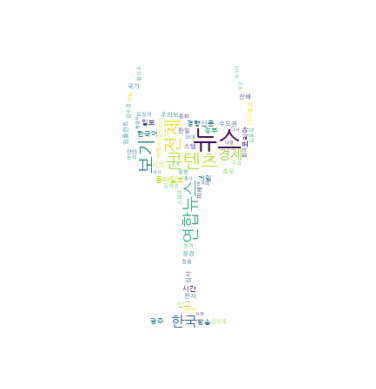

In [8]:
import numpy as np
from PIL import Image # 이미지를 위한 라이브러리
import matplotlib.pyplot as plt # 그래프 및 이미지화 라이브러리

wine_mask = np.array(Image.open('img.jpg'))
wordcloud = WordCloud(font_path="NanumGothic", background_color='white', mask=wine_mask, max_font_size=30).generate_from_frequencies(noun_freq_list)

plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear') 
plt.show()